<a href="https://colab.research.google.com/github/Pavel-Pyvovar/iasa_sys_an_2020_spring_fall/blob/master/sys_an_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disclosing Uncertaintes in System Analysis Problems

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 5.0) # set default size of plots

## Problems and Methods of Disclosing Goal Uncertainty

### Disclosing Goal Uncertainty Based on the Pareto Principle

  Given two objective functions $f_{1}$ and $f_{2}$ and their corresponding bounding values $f_{1}^*$ and $f_{2}^*$ find the Pareto set on the given interval using the following bounding conditions:   
  $f_{1}(x) <= f_{1}^*, f_{2}(x) >= f_{2}^*$

>$f_{1} = -5 + 1.6x + 1.5x^2$   
>$f_{2} = 275.5 - 0.5x^2$

>$f_1^* = 101$    
>$f_2^* = 163$

>$x^- = 5$   
>$x^+ = 20$

Transform conditions to the same form:
>$f_{1}(x) <= f_{1}^* $  
>$-f_{2}(x) <= -f_{2}^*$


In [0]:
f1 = lambda x: -5 + 1.6 * x + 1.5 * x**2
f2 = lambda x: -275.5 + 0.5 * x**2 # -f2

f1_, f2_ = 101, -163 #f1*, f2*
x_min, x_max = 5, 20

#### Step 1: define the Pareto set

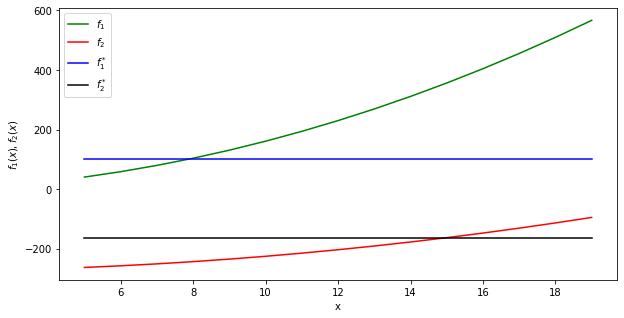

In [0]:
x = np.arange(x_min, x_max)
plt.plot(x, f1(x), color='green', label='$f_{1}$')
plt.plot(x, f2(x), color='red', label='$f_{2}$')
plt.plot(x, np.ones(x.shape) * f1_, color='blue', label='$f_{1}^*$')
plt.plot(x, np.ones(x.shape) * f2_, color='black', label='$f_{2}^*$')
plt.xlabel('x')
plt.ylabel('$f_{1}(x), f_{2}(x)$')
plt.legend()
plt.show()

Solve the following inequalities
>$-5 + 1.6x + 1.5x^2 <= 101$   
>$-275.5 + 0.5x^2 <= -163$


So the Pareto set is $[5, 7.8899]$ 

#### Step 2: Find a rational compromise on the Pareto set

$$
F_{1}\left(x^{0}\right)=\max _{x \in D} \min _{i \in[1, m]} \frac{f_{i}(x)}{f_{i}^{*}}
$$

$$
F_{2}\left(x^{0}\right)=\min _{x \in D} \max _{i \in[1, m]} \frac{f_{i}(x)}{f_{i}^{*}}
$$

In [0]:
pareto_set = np.arange(x_min, 7.8899, 0.001)

In [0]:
f1_f1_ = (f1(pareto_set)/f1_)

In [0]:
f2_f2_ = (f2(pareto_set)/f2_)

In [0]:
max_f1_f2 = np.max([f1_f1_, f2_f2_], axis=0)
min_f1_f2 = np.min([f1_f1_, f2_f2_], axis=0)

In [0]:
F1_0 = np.zeros(pareto_set.shape)
F2_0 = np.zeros(pareto_set.shape)

min_max, i = np.min(max_f1_f2), np.argmin(max_f1_f2)
F1_0[i] = min_max
max_min, i = np.max(min_f1_f2), np.argmax(min_f1_f2)
F2_0[i] = max_min

In [0]:
data = np.stack([f1_f1_, f2_f2_, max_f1_f2, F1_0, min_f1_f2, F2_0], axis=1)

In [0]:
table = pd.DataFrame(data,          
                     columns=['f1/f1_', 'f2/f2_',
                              'max(f1/f1*, f2/f2*)',
                              'min max (f1/f1*, f2/f2*)',
                              'min(f1/f1*, f2/f2*)',
                              'max min (f1/f1*, f2/f2*)'],
                     index=pareto_set)

In [0]:
table

,f1/f1_,f2/f2_,"max(f1/f1*, f2/f2*)","min max (f1/f1*, f2/f2*)","min(f1/f1*, f2/f2*)","max min (f1/f1*, f2/f2*)"
5.000,0.400990,1.613497,1.613497,0.000000,0.400990,0.000000
5.001,0.401154,1.613466,1.613466,0.000000,0.401154,0.000000
5.002,0.401319,1.613436,1.613436,0.000000,0.401319,0.000000
5.003,0.401483,1.613405,1.613405,0.000000,0.401483,0.000000
5.004,0.401648,1.613374,1.613374,0.000000,0.401648,0.000000
...,...,...,...,...,...,...
7.885,0.998771,1.499469,1.499469,0.000000,0.998771,0.000000
7.886,0.999021,1.499420,1.499420,0.000000,0.999021,0.000000
7.887,0.999271,1.499372,1.499372,0.000000,0.999271,0.000000
7.888,0.999521,1.499323,1.499323,0.000000,0.999521,0.000000


## Disclosing Uncertainty in Problems of Interaction


 \begin{array}{|c|c|c|c|c|c|}\hline   {f_{12}\left(x_{1}, x_{2}\right)} & {\left(2 x_{1}^{2}-4 x_{1}+18\right)\left(6 x_{2}^{2}-26 x_{2}+29\right)} & {0,01} & {x_{1}} & {0} & {2} \\ {f_{21}\left(x_{1}, x_{2}\right)} & {\left(-6 x_{2}^{2}+26\right)\left(-3 x_{1}^{2}+4 x_{1}+6\right)} & {0,01} & {x_{2}} & {0} & {2} \\ \hline\end{array} 

In [0]:
f12 = lambda x1, x2: (-6*x1**2 - 4*x1 + 18)*(6*x2**2 - 26*x2 + 29)
f21 = lambda x1, x2: (-6*x2**2 + 26) * (-3*x1**2 + 4*x1 + 6)
step = .01
x1_min, x2_min = 0, 0
x1_max, x2_max = 2, 2
x1_x2 = np.arange(0, 2+step, step)

#### The table method

$$
\begin{array}{l}{f_{12}^{*}=\max _{x_{1}} \min _{x_{2}} f_{12}\left(x_{1}, x_{2}\right)} \\ {f_{21}^{*}=\max _{x_{2}} \min _{x_{1}} f_{21}\left(x_{1}, x_{2}\right)}\end{array}
$$

In [0]:
f12_max_min = lambda x1_x2: np.max([np.min(f12(x1i, x1_x2)) for x1i in x1_x2])
f21_max_min = lambda x1_x2: np.max([np.min(f21(x1_x2, x2i)) for x2i in x1_x2])
f12_, f21_ = f12_max_min(x1_x2), f21_max_min(x1_x2)
f12_, f21_

(18.0, 52.0)

#### Classical method

$$
\begin{array}{l}f_{12}\left(x_{1}, x_{2}\right)=\left(2 x_{1}^{2}-4 x_{1}+18\right)\left(6 x_{2}^{2}-26 x_{2}+29\right) \\ \frac{\partial f_{12}}{\partial x_{2}}=\left(2 x_{1}^{2}-4 x_{1}+18\right)\left(12 x_{2}-26\right)=0 \\ 12 x_{2}-26=0 \\ x_{2}=\frac{26}{12}=\frac{13}{6}>2 \\ f_{12}(0,2)=(2-4+18)(6 \cdot 4-26 \cdot 2+25)=18\end{array}
$$


$$
\begin{array}{l}f_{21}\left(x_{1}, x_{2}\right)=\left(-6 x_{2}^{2}+26\right)\left(-3 x_{1}^{2}+4 x_{1}+6\right) \\ \frac{\partial f_{21}}{\partial x_{1}}=\left(-6 x_{2}^{2}+26\right)\left(-6 x_{1}+4\right)=0 \\ -6 x_{1}+4=0 \\ x_{1}=1 / 6=2 / 3\end{array}
$$

$$ f_{21}(2/3,2)=26 \cdot(-3 \cdot 4+8+6)=52
$$

#### Graphical method

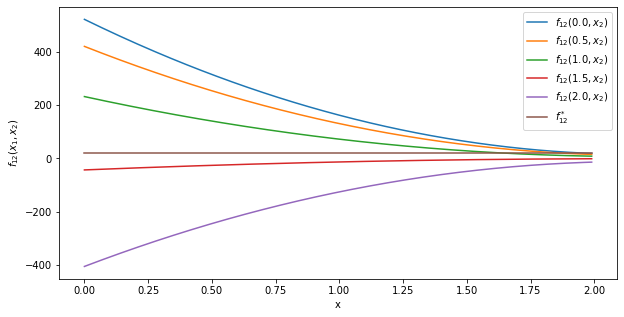

In [0]:
for i in np.arange(0, x1_max + 0.5, 0.5):
  plt.plot(x1_x2, f12(i, x1_x2), label=f'$f_{{12}}({i}, x_{2})$')
plt.plot(x1_x2, f12_*np.ones(x1_x2.shape), label='$f_{12}^*$')
plt.xlabel('x')
plt.ylabel('$f_{12}(x_1, x_2)$')
plt.legend()
f1_, f2_ = 101, -163 #f1*, f2*
x_min, x_max = 5, 20
f1_, f2_ = 101, -163 #f1*, f2*
x_min, x_max = 5, 20
plt.show()
f1_, f2_ = 101, -163 #f1*, f2*
x_min, x_max = 5, 20

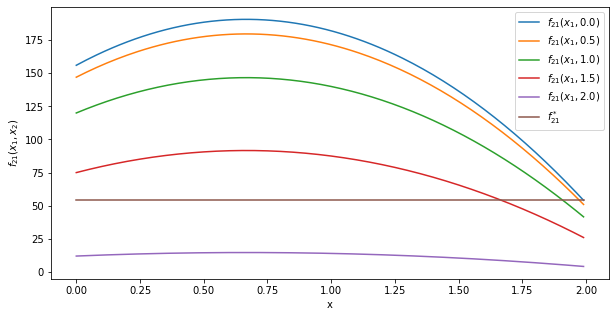

In [0]:
for i in np.arange(0, x1_max + 0.5, 0.5):
  plt.plot(x1_x2, f21(x1_x2, i), label=f'$f_{{21}}(x_{1}, {i})$')
plt.plot(x1_x2, f21_*np.ones(x1_x2.shape), label='$f_{21}^*$')
plt.xlabel('x')
plt.ylabel('$f_{21}(x_1, x_2)$')
plt.legend()
plt.show()

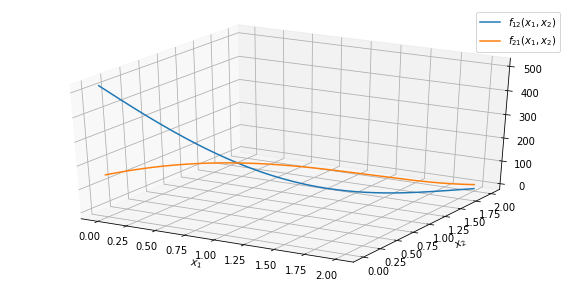

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1_x2, x1_x2, f12(x1_x2, x1_x2), label='$f_{{12}}(x_1, x_2)$')
ax.plot(x1_x2, x1_x2, f21(x1_x2, x1_x2), label='$f_{{21}}(x_1, x_2)$')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
# plt.zlabel('$f_{{12}}(x_{1}, x_{2})$')
plt.legend()
plt.show()